<span style="font-size: 30px; font-weight: bold;">Football Player Stats</span>

In [2]:
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import psycopg2

In [3]:
players_df = pd.read_csv("C:/Users/CHZ/Desktop/2021-2022 Football Player Stats.csv", sep=";", encoding="ISO-8859-1")              

In [4]:
players_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [5]:
players_df.shape

(2921, 143)

In [6]:
players_df.dtypes

Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Length: 143, dtype: object

In [7]:
players_df.dtypes.value_counts()

float64    133
int64        5
object       5
Name: count, dtype: int64

<span style="font-size: 13pt;">En la siguiente celda, se reviso la existencia de valores nulos en las columnas del conjunto de datos. Donde se ha observado la presencia de valores nulos en las columnas 'Nation' y 'Age'</span>

In [8]:
players_df.isnull().any()

Rk         False
Player     False
Nation      True
Pos        False
Squad      False
           ...  
OG         False
Recov      False
AerWon     False
AerLost    False
AerWon%    False
Length: 143, dtype: bool

<span style="font-size: 13pt;">Aquí, evaluamos la cantidad de valores nulos en las columnas 'Age' y 'Nation'. Observamos que en ambas columnas solo hay un valor nulo, lo cual tiene un impacto insignificante en los análisis y procedimientos subsiguientes.</span>

In [9]:
Nulls1 = players_df[['Nation', 'Age']].isnull().sum()
print(Nulls1)

Nation    1
Age       1
dtype: int64


In [10]:
players_df.drop('Rk', axis=1).describe(include='int64')

,Born,MP,Starts,Min
count,2921.000000,2921.000000,2921.000000,2921.000000
mean,1994.725094,18.800068,13.749743,1234.756248
std,37.210426,11.619882,11.393763,977.941288
min,0.000000,1.000000,0.000000,1.000000
25%,1992.000000,8.000000,3.000000,307.000000
50%,1996.000000,20.000000,12.000000,1102.000000
75%,1999.000000,29.000000,23.000000,2025.000000
max,2006.000000,38.000000,38.000000,3420.000000


In [11]:
players_df.describe(include="object") 

,Player,Nation,Pos,Squad,Comp
count,2921,2920,2921,2921,2921
unique,2786,102,11,98,5
top,Marcelo,ESP,DF,Salernitana,Serie A
freq,3,435,942,42,632


<span style="font-size: 13pt;">En este análisis, también examinamos las diversas posiciones y sus variantes. Aquellos jugadores cuyas posiciones están representadas por 4 caracteres son aquellos que tienen la capacidad o experiencia de desempeñarse en dos posiciones distintas.</span>

In [12]:
players_df['Pos'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

<span style="font-size: 13pt;">Durante la revisión de las columnas, notamos la presencia de algunas columnas con valores idénticos. Estas columnas fueron eliminadas, ya que no aportan significado sustancial y podrían introducir multicolinealidad con otras columnas. Los casos específicos que abordamos fueron los siguientes:</span>

In [ ]:
p = df[['pasatt','pastoatt']]
a = p.head(10)
print(a)

In [ ]:
p = df[['pascmp','pastotcmp']]
a = p.head(10)
print(a)

In [ ]:
p = df[['pascrs','crs',]]
a = p.head(10)
print(a)

<span style="font-size: 25px; font-weight: bold;">Graficas</span>

<span style="font-size: 13pt;">En esta sección, exploramos el conjunto de datos mediante la creación de diversas visualizaciones que nos brindarán una comprensión más profunda del contenido del csv.</span>

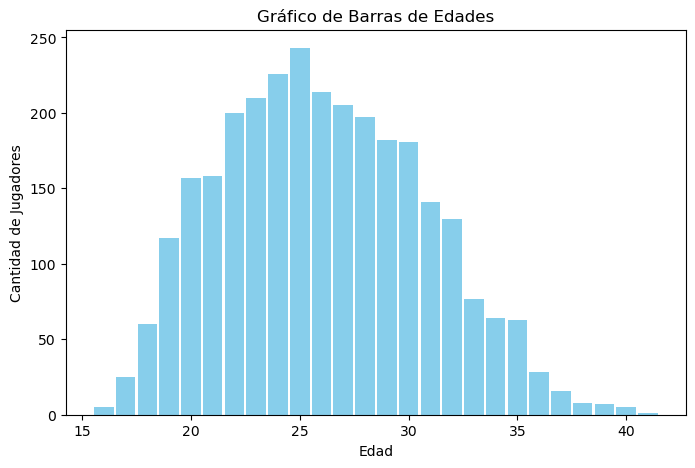

In [73]:
age_counts = players_df['Age'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(age_counts.index, age_counts.values, width=0.9, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.title('Gráfico de Barras de Edades')
plt.show()

<span style="font-size: 13pt;">En esta primera gráfica, un histograma de Edades. Exploramos la distribución de las edades de los jugadores en el conjunto de datos. Donde notablemente, destaca una concentración significativa de jugadores en el rango de 22 a 28 años. Esta tendencia sugiere una correspondencia con las edades predominantes en las principales ligas de fútbol del mundo.</span>

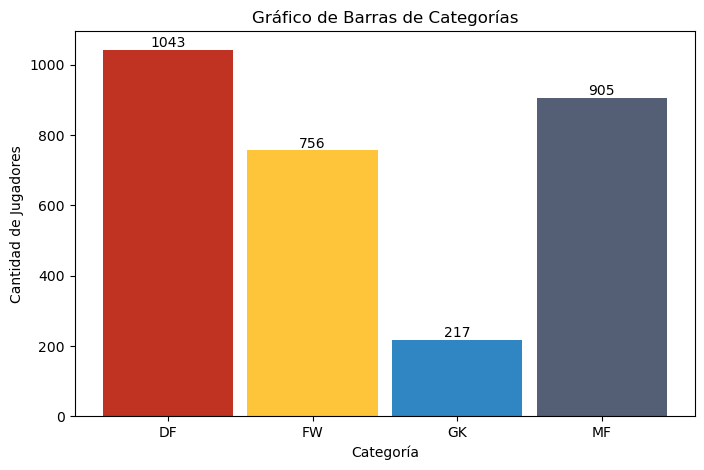

In [84]:
players_df['Categoria'] = players_df['Pos'].str[:2]

categoria_mapping = {'DF': 'DF', 'MF': 'MF', 'FW': 'FW', 'GK': 'GK'}
players_df['Categoria'] = players_df['Categoria'].map(categoria_mapping)

categoria_counts = players_df['Categoria'].value_counts().sort_index()
colores = ['#C03221', '#FFC53A', '#3085C3', '#545E75']

plt.figure(figsize=(8, 5))
bars = plt.bar(categoria_counts.index, categoria_counts.values, width=0.9, color=colores)
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Jugadores')
plt.title('Gráfico de Barras de Categorías')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()

<span style="font-size: 13pt;">En el segundo histograma, que representa las posiciones de los jugadores, observamos una distribución destacada. Notamos una cantidad significativa de defensas y delanteros.</span>

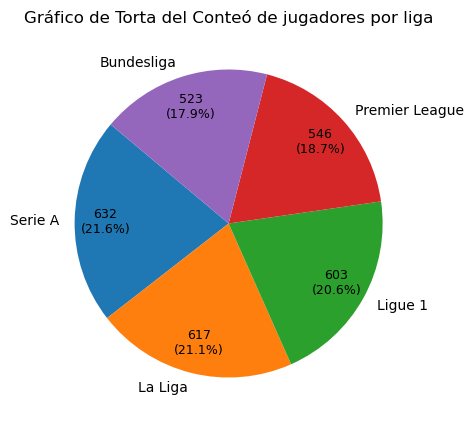

In [75]:
liga_counts = players_df['Comp'].value_counts()

total_jugadores = len(players_df)

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(liga_counts, labels=liga_counts.index, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * total_jugadores / 100, p),
                                   startangle=140, pctdistance=0.8)

for text, autotext in zip(texts, autotexts):
    text.set_size(10)
    autotext.set_size(9)

plt.title('Gráfico de Torta del Conteó de jugadores por liga')
plt.show()

<span style="font-size: 13pt;">En nuestro tercer gráfico, una visualización en forma de torta, exploramos el recuento de jugadores por cada liga. Donde se destaca que contamos con una distribución relativamente equitativa de jugadores entre las diversas ligas, sin diferencias significativas. Sin embargo, se observa una ligera tendencia en la Serie A.</span>

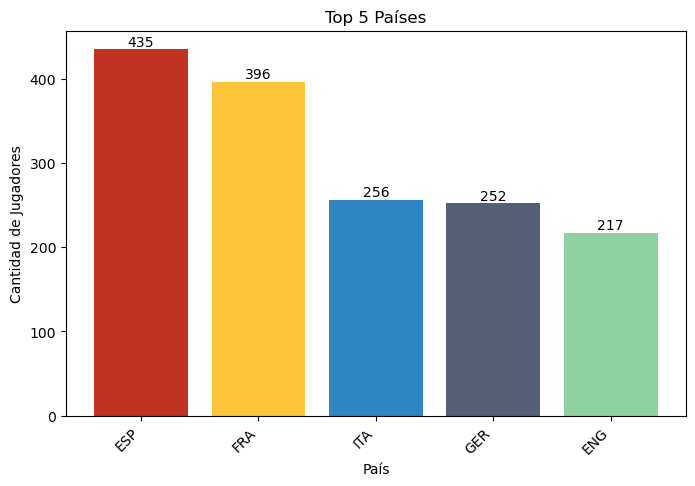

In [82]:
top_paises = players_df['Nation'].value_counts().nlargest(5)
colores = ['#C03221', '#FFC53A', '#3085C3', '#545E75', '#90D1A4']

plt.figure(figsize=(8, 5))
bars = plt.bar(top_paises.index, top_paises, color=colores)

for bar, cantidad in zip(bars, top_paises):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(cantidad), ha='center', va='bottom', color='black')

plt.xlabel('País')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 5 Países')
plt.xticks(rotation=45, ha='right') 
plt.show()

<span style="font-size: 13pt;">En nuestra última gráfica de barras, enfocada en el conteo de jugadores por país, presentamos el top 5 de naciones más representadas en nuestro conjunto de datos. Se evidencia una clara tendencia, con España y Francia destacándose significativamente en comparación con otros países. Este top 5 refleja la fuerte presencia de naciones que históricamente han sobresalido en el ámbito del fútbol.</span>

<span style="font-size: 30px; font-weight: bold;">Football Value</span>

In [ ]:
connection = connect_postgres()
cursor = connection.cursor()
cursor.execute("""SELECT * FROM playervalue""")
connection.commit()
resultados = cursor.fetchall()
df = pd.DataFrame(resultados)
df.columns=['Rk','Name','Age','Value','Team','Nationality','Position']
print(df.head())

In [33]:
value_df = pd.read_csv("C:/Users/CHZ/Desktop/transfermarkt_player_data.csv", sep=",", encoding="utf-8")    

In [49]:
value_df.head(20)

,Unnamed: 0,Player Name,Player Age,Value,Team,Nationality,Position,valor_numerico,Posicion_Agrupada,rango
0,0,Ederson,29,€45.00m,Manchester City,Brazil,Goalkeeper,45000000.0,Arquero,0-50M
1,1,Stefan Ortega,30,€6.00m,Manchester City,Germany,Goalkeeper,6000000.0,Arquero,0-50M
2,2,Scott Carson,37,€250k,Manchester City,England,Goalkeeper,250000.0,Arquero,0-50M
3,3,Rúben Dias,25,€75.00m,Manchester City,Portugal,Centre-Back,75000000.0,Defensas,50-100M
4,4,Nathan Aké,28,€35.00m,Manchester City,Netherlands,Centre-Back,35000000.0,Defensas,0-50M
5,5,John Stones,28,€30.00m,Manchester City,England,Centre-Back,30000000.0,Defensas,0-50M
6,6,Aymeric Laporte,28,€30.00m,Manchester City,Spain,Centre-Back,30000000.0,Defensas,0-50M
7,7,Manuel Akanji,27,€30.00m,Manchester City,Switzerland,Centre-Back,30000000.0,Defensas,0-50M
8,8,Sergio Gómez,22,€15.00m,Manchester City,Spain,Left-Back,15000000.0,Defensas,0-50M
10,10,Kyle Walker,32,€15.00m,Manchester City,England,Right-Back,15000000.0,Defensas,0-50M


In [30]:
value_df.shape

(11049, 9)

In [16]:
value_df.dtypes

Unnamed: 0      int64
Player Name    object
Player Age      int64
Value          object
Team           object
Nationality    object
Position       object
dtype: object

<span style="font-size: 13pt;">Durante la revision de las columnas del dataset, de las cuales solo 2 son tipo 'int', el resto son 'varchar', la columna value se toma como varchar ya que posee signos y el denominador de cantidad (miles, millones), es muy probable que esta columna sea modificada mas adelante</span>

In [17]:
value_df.dtypes.value_counts()

object    5
int64     2
Name: count, dtype: int64

In [18]:
value_df.isnull().any()

Unnamed: 0     False
Player Name    False
Player Age     False
Value          False
Team           False
Nationality    False
Position       False
dtype: bool

In [19]:
value_df.describe(include="object") 

,Player Name,Value,Team,Nationality,Position
count,11049,11049,11049,11049,11049
unique,10963,125,401,137,16
top,Paulinho,€300k,Varbergs BoIS,France,Centre-Back
freq,4,709,42,515,1911


<span style="font-size: 25px; font-weight: bold;">Graficas</span>

<span style="font-size: 13pt;">De igual manera que en el csv anterior exploramos el conjunto de datos mediante diversas visualizaciones para profundizar en su comprensión y obtener perspectivas valiosas.</span>

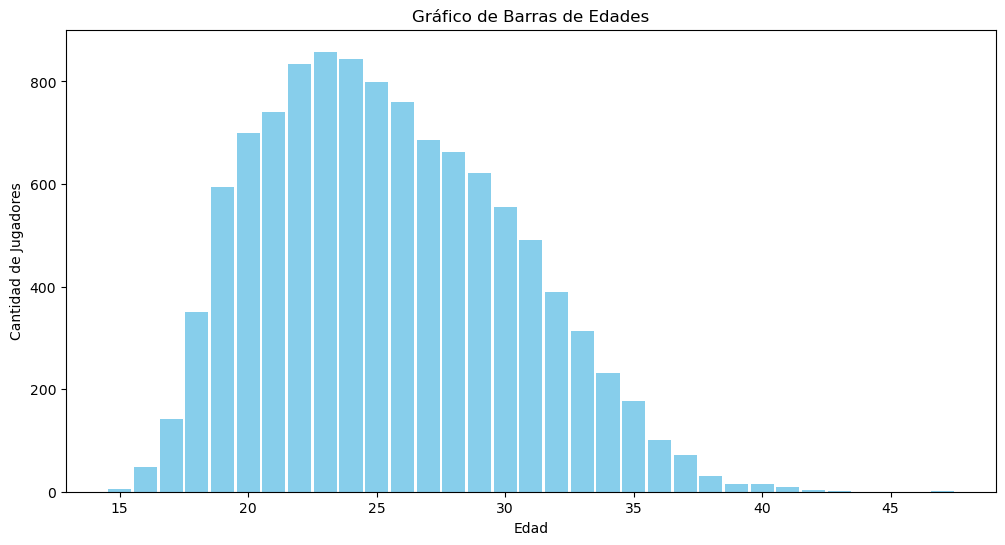

In [22]:
age_counts = value_df['Player Age'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, width=0.9, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Jugadores')
plt.title('Gráfico de Barras de Edades')
plt.show()

<span style="font-size: 13pt;">El histograma representa la distribución de las edades de los jugadores presentes en el conjunto de datos. Se observa una amplia variabilidad en las edades, lo que indica la presencia de jugadores de diferentes rangos de edad. Sin embargo, destaca un grupo significativo de jugadores cuyas edades se encuentran principalmente en el rango de 21 a 25 años.</span>

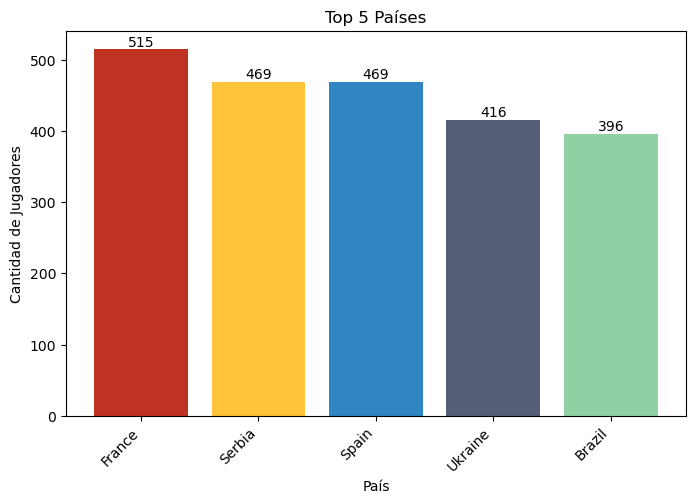

In [23]:
top_paises = value_df['Nationality'].value_counts().nlargest(5)
colores = ['#C03221', '#FFC53A', '#3085C3', '#545E75', '#90D1A4']

plt.figure(figsize=(8, 5))
bars = plt.bar(top_paises.index, top_paises, color=colores)

for bar, cantidad in zip(bars, top_paises):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(cantidad), ha='center', va='bottom', color='black')

plt.xlabel('País')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 5 Países')
plt.xticks(rotation=45, ha='right') 
plt.show()

<span style="font-size: 13pt;">El gráfico de barras ilustra las nacionalidades más frecuentes entre los jugadores del conjunto de datos. El top 5 de nacionalidades revela la presencia destacada de jugadores procedentes de países que han dejado una huella significativa a lo largo de la historia de este deporte. Este análisis sugiere similitudes con el conjunto de datos anterior, donde también se observaba una presencia notable de jugadores provenientes de países como Francia y España.</span>

C:\Users\CHZ\AppData\Local\Temp\ipykernel_7776\1115535287.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


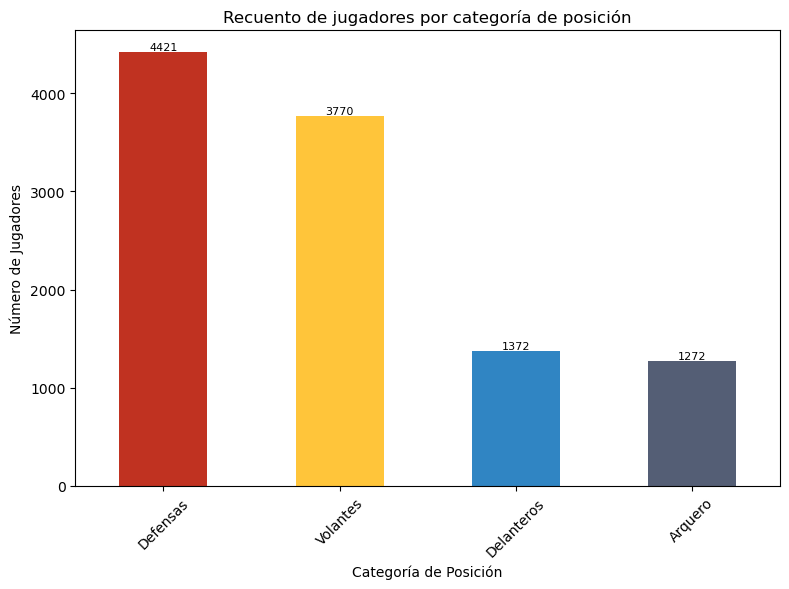

In [45]:
def agrupar_posiciones(posicion):
    if posicion in ['Goalkeeper']:
        return 'Arquero'
    elif posicion in ['Centre-Back', 'Left-Back', 'Right-Back', 'Defensive Midfield']:
        return 'Defensas'
    elif posicion in ['Central Midfield', 'Attacking Midfield', 'Left Winger', 'Right Winger',
                      'Left Midfield', 'Right Midfield', 'midfield']:
        return 'Volantes'
    elif posicion in ['Centre-Forward', 'Second Striker', 'Attack']:
        return 'Delanteros'

value_df['Posicion_Agrupada'] = value_df['Position'].apply(agrupar_posiciones)

conteo_posiciones = value_df['Posicion_Agrupada'].value_counts()
colores = ['#C03221', '#FFC53A', '#3085C3', '#545E75', '#90D1A4']
plt.figure(figsize=(8, 6))
conteo_posiciones.plot(kind='bar', color=colores)
plt.title('Recuento de jugadores por categoría de posición')
plt.xlabel('Categoría de Posición')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45) 
plt.tight_layout()
for index, value in enumerate(conteo_posiciones):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

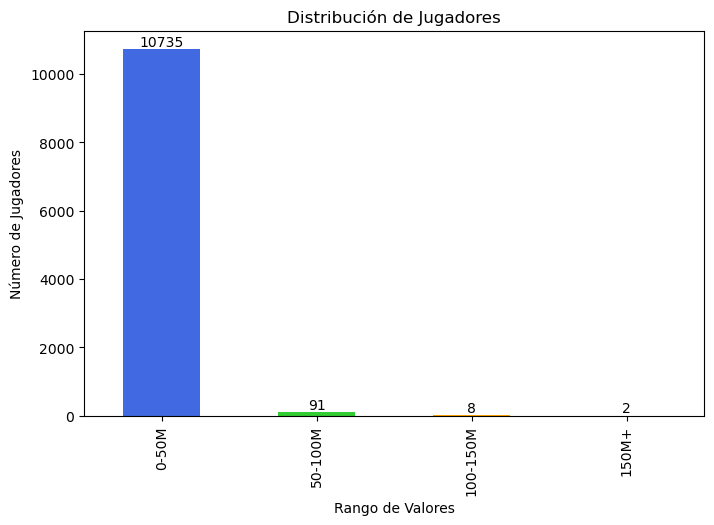

In [55]:
def convertir_valor(valor):
    if valor.endswith('k'):
        return float(valor[1:-1]) * 1000
    elif valor.endswith('m'):
        return float(valor[1:-1]) * 1000000
    else:
        return 0

value_df['valor_numerico'] = value_df['Value'].apply(convertir_valor)

rangos = [0, 50000000, 100000000, 150000000, float('inf')]
etiquetas = ['0-50M', '50-100M', '100-150M', '150M+']

value_df['rango'] = pd.cut(value_df['valor_numerico'], bins=rangos, labels=etiquetas, right=False)

conteo = value_df['rango'].value_counts().reindex(etiquetas, fill_value=0)

plt.figure(figsize=(8, 5))
grafico = conteo.plot(kind='bar', color=['royalblue', 'limegreen', 'orange', 'red'])
plt.xlabel('Rango de Valores')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Jugadores')

for i in grafico.patches:
    grafico.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

plt.show()